In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Constantes del problemas

Lx=128
Ly=128

Q=5
W0=1.0/3

C=0.5 #C<0.707 cells/click
C2=C*C
AUX0=1-3*C2*(1-W0)

tau=0.5
Utau=1.0/tau
UmUtau=1-Utau

In [47]:
class LatticeB:
    def __init__(self):
        self.w = np.zeros(Q)
        self.w[0]= W0
        self.w[1]=self.w[2]=self.w[3]=self.w[4]=(1.0-W0)/4

        self.vx =  np.zeros(Q)
        self.vy =  np.zeros(Q)
        self.vx[0]=0; self.vx[1]=1; self.vx[2]=0; self.vx[3]=-1; self.vx[4]=0
        self.vy[0]=0; self.vy[1]=0; self.vy[2]=1; self.vy[3]=0; self.vy[4]=-1

        self.f=np.zeros(Q*Lx*Ly)
        self.fnew=np.zeros(Q*Lx*Ly)

    def n(self, ix, iy, i):
        return int((ix*Ly+iy)*Q+i)

    def rho(self, ix, iy, usenew):
        sum=0
        for i in range(Q):
            n0=self.n(ix,iy,i)
            if (usenew):
                sum+= self.fnew[n0]
            else: 
                sum+=self.f[n0]
        return sum
    
    def Jx(self, ix, iy, usenew):
        sum=0
        for i in range(Q):
            n0=self.n(ix,iy,i)
            if usenew:
                sum+=self.vx[i]*self.fnew[n0]
            else:
                sum+=self.vx[i]*self.f[n0]
        return sum
    
    def Jy(self, ix, iy, usenew):
        sum=0
        for i in range(Q):
            n0=self.n(ix,iy,i)
            if usenew:
                sum+=self.vy[i]*self.fnew[n0]
            else:
                sum+=self.vy[i]*self.f[n0]
        return sum
    
    def feq(self, rho0, Jx0, Jy0, i):
        if i>0: 
            return 3*self.w[i]*(C2*rho0 + self.vx[i]*Jx0 + self.vy[i]*Jy0)
        else:
            return rho0*AUX0
        
    def star(self, rho0, Jx0, Jy0):
        for ix in range(Lx):
            for iy in range(Ly):
                for i in range(Q):
                    n0=self.n(ix,iy,i)
                    self.f[n0]=self.feq(rho0, Jx0, Jy0, i)
    
    def collision(self):
        for ix in range(Lx):
            for iy in range(Ly):
                rho0 = self.rho(ix, iy, False)
                Jx0 = self.Jx(ix, iy, False)
                Jy0 = self.Jy(ix, iy, False)
                for i in range(Q):
                    n0=self.n(ix,iy,i)
                    self.fnew[n0]=UmUtau*self.f[n0] + Utau*self.feq(rho0, Jx0, Jy0, i)
    
    def imposeFields(self, t):
        lamn=10
        omega=2*np.pi/lamn*C
        ix=int(Lx/2); iy=int(Ly/2)
        rho0=10*np.sin(omega*t); Jx0=self.Jx(ix, iy, False); Jy0=self.Jy(ix, iy, False)
        for i in range(Q):
            n0=self.n(ix,iy,i)
            self.fnew[n0]=self.feq(rho0, Jx0, Jy0, i)
    
    def adveccion(self):
        for ix in range(Lx):
            for iy in range(Ly):
                for i in range(Q):
                    ixnew=(ix+self.vx[i]+Lx)%Lx; iynew=(iy+self.vy[i]+Ly)%Ly
                    n0=self.n(ix,iy,i)
                    n0new=self.n(ixnew,iynew,i)
                    self.f[n0new]=self.fnew[n0]

In [48]:
ondas = LatticeB()

tmax=100
rho0=0 
Jx0=0 
Jy0=0

ondas.star(rho0, Jx0, Jy0)

for t in range(tmax):
    ondas.collision()
    ondas.imposeFields(t)
    ondas.adveccion()


In [53]:
#Datos
densidad=np.zeros((Lx,Ly))

for ix in range(Lx):
    for iy in range(Ly):
        densidad[ix,iy]=ondas.rho(ix, iy, True)


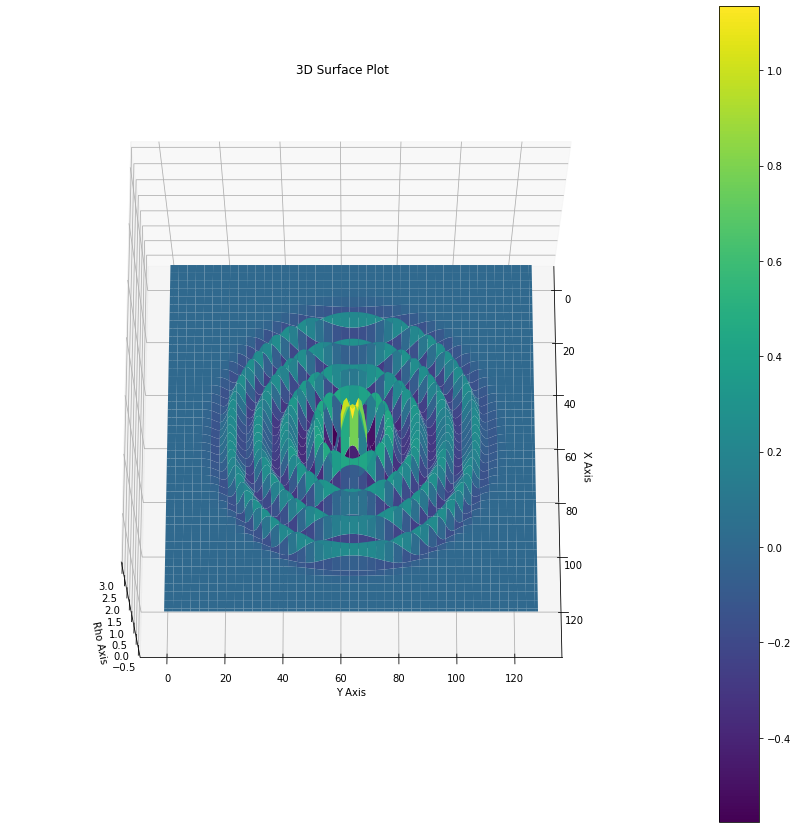

In [68]:
#Grafica

# Example data
x = np.arange(0,Lx,1)
y = np.arange(0,Ly,1)
x, y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(x, y, densidad, cmap='viridis')
fig.colorbar(surface)
# Labels and title
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Rho Axis')
ax.set_title('3D Surface Plot')
ax.view_init(elev=70, azim=0)

# Show the plot
plt.show()

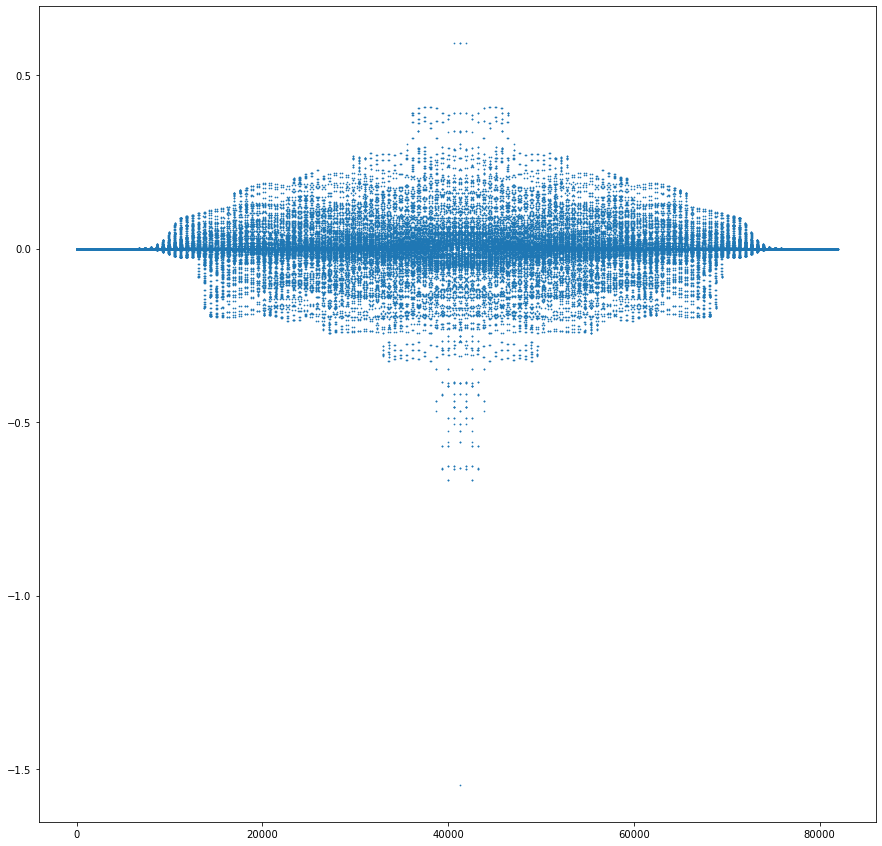

In [70]:
ejex=np.arange(0,ondas.fnew.size,1)

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(ejex,ondas.fnew , s=0.5)